In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [0]:
np.random.seed(0)

In [0]:
data=mnist.load_data()

In [0]:
len(data[0][1])

60000

In [0]:
x,y = data

In [0]:
len(x)

2

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
#plt.imshow(x_train[y_train==1])


In [0]:
x_train[0].shape

(28, 28)

In [0]:
x_train[0]==(y_train==4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [0]:
# for i in range(5):
#   plt.imshow(x_train[i])
#   plt.subplot(22)
  

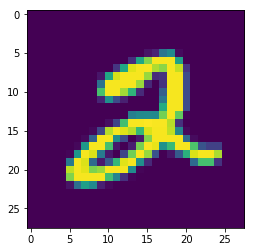

In [0]:
plt.imshow(x_train[y_train==2][0])

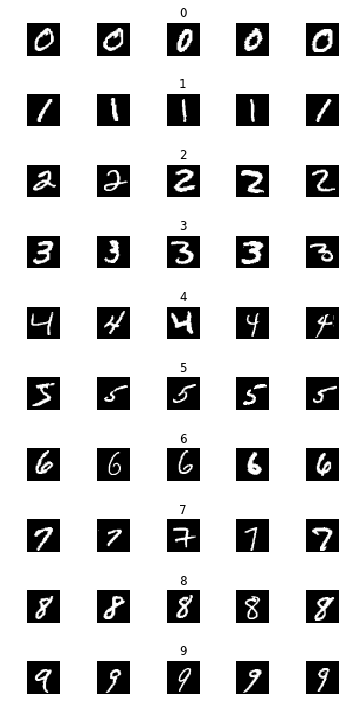

In [0]:
num_of_sample=[]
num_classes=10
fig,ax=plt.subplots(nrows=num_classes, ncols=5, figsize=(5,10))
fig.tight_layout()
for i in range(num_classes):
  for j in range(5):
    number=x_train[y_train==i]
    ax[i][j].imshow(number[j],cmap='gray')
    ax[i][j].axis('off')
    if j==2:
      ax[i][j].set_title(str(i))
      num_of_sample.append(len(number))

In [0]:
num_of_sample

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [0]:
numbers=[0,1,2,3,4,5,6,7,8,9]

([<matplotlib.axis.XTick at 0x7fa458290cc0>,
 <a list of 10 Text xticklabel objects>)

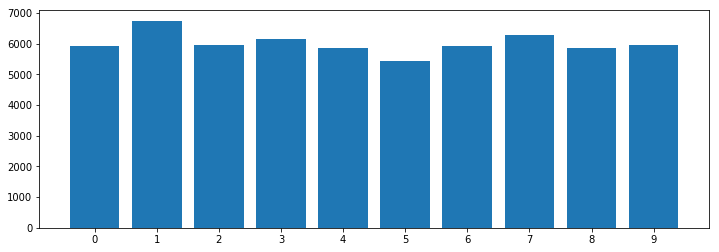

In [0]:
plt.figure(figsize=(12,4))
plt.bar(range(10),num_of_sample)
plt.xticks(numbers)

In [0]:
x_train=x_train.reshape(-1,28,28,1)
#x_test=x_test.reshape(-1,28,28,1)

In [0]:
y_train=to_categorical(y_train,10)
#y_test=to_categorical(y_test,10)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
y_train.shape


(60000, 10)

In [0]:
def le_net():
    model=Sequential()
    model.add(Conv2D(30,(5,5),input_shape = (28,28,1), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
lenet=le_net()
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
__________

In [0]:
history=lenet.fit(x_train,
                  y_train,
                  epochs=10,
                  validation_split=0.1,
                  batch_size=400,
                  verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 53s 976us/step - loss: 0.5799 - acc: 0.8173 - val_loss: 0.0979 - val_acc: 0.9713
Epoch 2/10
54000/54000 [==============================] - 53s 985us/step - loss: 0.1446 - acc: 0.9569 - val_loss: 0.0638 - val_acc: 0.9818
Epoch 3/10
54000/54000 [==============================] - 53s 986us/step - loss: 0.1033 - acc: 0.9689 - val_loss: 0.0493 - val_acc: 0.9855
Epoch 4/10
54000/54000 [==============================] - 53s 988us/step - loss: 0.0847 - acc: 0.9742 - val_loss: 0.0417 - val_acc: 0.9877
Epoch 5/10
54000/54000 [==============================] - 53s 982us/step - loss: 0.0734 - acc: 0.9777 - val_loss: 0.0414 - val_acc: 0.9883
Epoch 6/10
54000/54000 [==============================] - 53s 988us/step - loss: 0.0655 - acc: 0.9805 - val_loss: 0.0403 - val_acc: 0.9885
Epoch 7/10
54000/54000 [==============================] - 53s 981us/step - loss: 0.0605 - acc: 0.9818 - val_loss: 0.0

Text(0.5, 0, 'Epochs')

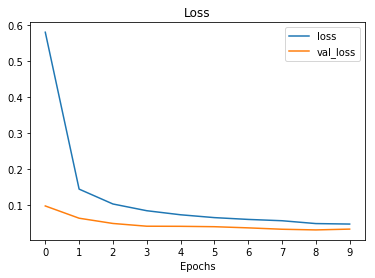

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xticks(range(10))
plt.xlabel('Epochs')


Text(0.5, 0, 'Epochs')

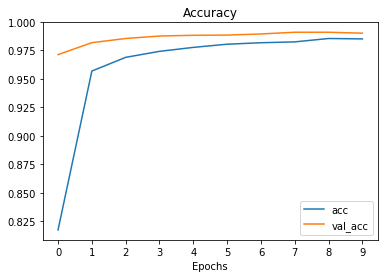

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xticks(range(10))
plt.xlabel('Epochs')

In [0]:
history.history['acc']

[0.9149444386363029,
 0.9699444470582185,
 0.9742037137349446,
 0.9778889015868858,
 0.9793333490689595,
 0.9812592713921159,
 0.9797407556463171,
 0.9814259418734798,
 0.9811111269173799,
 0.9811296458597536]

In [0]:
history.history['val_acc']

[0.9855000138282776,
 0.987333345413208,
 0.9893333435058593,
 0.9876666784286499,
 0.9901666760444641,
 0.9861666798591614,
 0.9883333444595337,
 0.9920000076293946,
 0.9878333449363709,
 0.9913333415985107]

In [0]:
y_test.shape

(10000,)

In [0]:
import cv2 as cv
from PIL import Image
import requests as r
url="https://johnloeber.com/images/kmeans-mnist/nines/0.png"


In [0]:
img=r.get(url,stream=True)
img=Image.open(img.raw).convert('L')

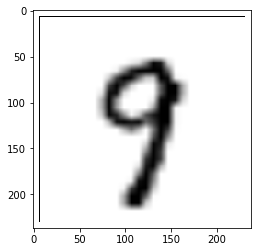

In [0]:
plt.imshow(img, cmap='gray')

In [0]:
img=np.array(img)

In [0]:
img.shape

(237, 237)

In [0]:
img=cv.resize(img,(28,28))

In [0]:
img=img/255

In [0]:
img=img.reshape(1,28,28,1)

In [0]:
img.shape

(1, 28, 28, 1)

In [0]:
lenet.predict_classes(img)

array([9])